# Training Neural Networks with Keras

### Goals: 
- Intro: train a neural network with `tensorflow` and the Keras layers

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
digits.images.shape

(1797, 8, 8)

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

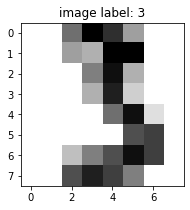

In [5]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

## Train / Test Split

Let's keep some held-out data to be able to measure the generalization performance of our model.

In [6]:
from sklearn.model_selection import train_test_split


data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

In [7]:
X_train.shape

(1527, 64)

In [8]:
X_test.shape

(270, 64)

In [9]:
y_train.shape

(1527,)

In [10]:
y_test.shape

(270,)

## Preprocessing of the Input Data


Make sure that all input variables are approximately on the same scale via input normalization:

In [11]:
from sklearn import preprocessing


# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

In [12]:
X_train.shape

(1527, 64)

In [13]:
X_train.mean(axis=0)

array([ 0.00000000e+00,  1.82717315e-07,  1.44815475e-08, -3.13441575e-08,
       -7.49449391e-09, -9.50473567e-09, -7.10805850e-08,  6.18783673e-08,
       -3.06025143e-08,  1.31056055e-07,  3.27103429e-08, -3.59111163e-09,
       -4.29372049e-09, -1.07733342e-08, -1.92827070e-08, -7.90239696e-08,
        1.56408518e-07, -2.18589391e-09,  2.89630950e-08, -1.74090840e-08,
        6.71381741e-08,  5.87068669e-08, -9.85213617e-08, -4.79598782e-07,
       -2.98413561e-08, -4.19223234e-08, -1.82522143e-07,  1.79555570e-08,
       -3.11294706e-08,  2.08440607e-08, -6.83091841e-08,  9.33420665e-07,
        0.00000000e+00,  1.78774897e-08,  1.50670544e-07, -3.45839659e-08,
       -1.02463780e-08, -3.66137236e-08, -5.67551766e-08,  0.00000000e+00,
       -2.17120757e-07, -6.30981702e-08, -1.81116935e-08, -2.62307278e-08,
       -7.95509294e-08, -1.95169103e-09, -8.23613622e-09,  4.77871538e-08,
       -1.66303593e-07, -1.25688899e-07, -2.30299548e-08, -1.13198082e-08,
        2.51387576e-07, -

In [14]:
X_train.std(axis=0)

array([0.        , 0.99999774, 0.9999994 , 1.0000005 , 0.9999989 ,
       0.9999988 , 1.0000077 , 0.9999965 , 1.0000098 , 0.9999947 ,
       1.0000007 , 0.9999992 , 0.9999999 , 0.99999684, 0.9999984 ,
       0.99999887, 0.9999969 , 1.000001  , 1.0000002 , 1.0000025 ,
       0.99999905, 1.000004  , 1.0000008 , 0.9999972 , 0.9999967 ,
       0.99999726, 1.        , 1.0000007 , 1.0000029 , 0.9999996 ,
       0.99999696, 1.0000001 , 0.        , 1.0000007 , 1.0000023 ,
       0.9999993 , 0.9999994 , 0.9999997 , 0.9999955 , 0.        ,
       0.9999891 , 0.99999785, 1.0000032 , 0.9999999 , 0.99999756,
       1.000001  , 0.999996  , 0.9999987 , 1.0000006 , 0.9999936 ,
       1.0000038 , 1.0000004 , 1.0000012 , 0.999997  , 0.99999785,
       0.9999988 , 0.9999857 , 1.0000073 , 0.9999967 , 1.0000031 ,
       0.9999993 , 1.        , 0.999996  , 0.9999977 ], dtype=float32)

Let's display the one of the transformed sample (after feature standardization):

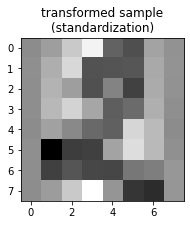

In [15]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

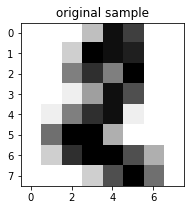

In [16]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index:sample_index+1]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [17]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [18]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


## Preprocessing of the Target Data


To train a first neural network we also need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [19]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [20]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [21]:
Y_train.shape

(1527, 10)

## Feed Forward Neural Networks with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://www.tensorflow.org/guide/keras/overview
- Experiment with different optimizers, activations, size of layers, initializations

### A First Keras Model

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
39/39 [==============================] - 0s 5ms/step - loss: 0.9163 - accuracy: 0.7600 - val_loss: 0.3899 - val_accuracy: 0.9118
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.9328 - val_loss: 0.2626 - val_accuracy: 0.9412
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9582 - val_loss: 0.2032 - val_accuracy: 0.9542
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9648 - val_loss: 0.1817 - val_accuracy: 0.9510
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9762 - val_loss: 0.1609 - val_accuracy: 0.9542
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9779 - val_loss: 0.1497 - val_accuracy: 0.9575
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9820 - val_loss: 0.1364 - val_accuracy: 0.9641
Epoch 8/15
39/39 [==

### Visualizing the Convergence

Let's wrap the keras history info into a pandas dataframe for easier plotting:

In [23]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

In [61]:
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.932099,0.753481,0.430206,0.908497,0
1,0.327857,0.936118,0.277335,0.941176,1
2,0.227207,0.954136,0.228243,0.950980,2
3,0.178380,0.966421,0.192914,0.957516,3
4,0.149158,0.971335,0.174542,0.960784,4
5,0.127952,0.974611,0.163800,0.960784,5
6,0.112626,0.980344,0.153092,0.967320,6
7,0.100143,0.982801,0.139429,0.967320,7
8,0.089325,0.987715,0.134928,0.970588,8
9,0.081452,0.986077,0.128175,0.964052,9


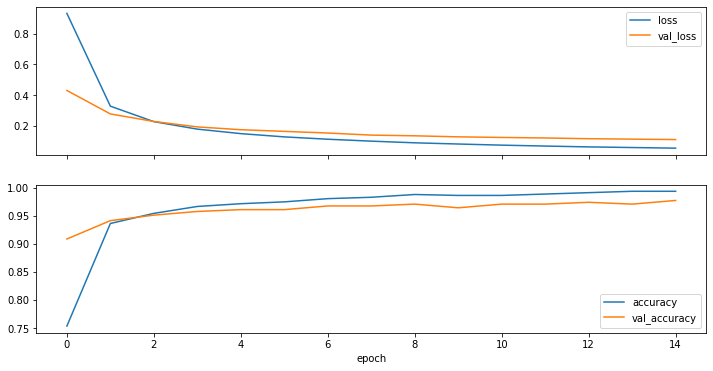

In [24]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

- at the beginning: val_loss lower than loss => Keras uses a moving average

### Monitoring Convergence with Tensorboard

Tensorboard is a built-in neural network monitoring tool. 

In [62]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [63]:
!rm -rf tensorboard_logs

In [64]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=15,
          callbacks=[tensorboard_callback]);

Epoch 1/15
39/39 [==============================] - 1s 10ms/step - loss: 0.8846 - accuracy: 0.7690 - val_loss: 0.4172 - val_accuracy: 0.9118
Epoch 2/15
39/39 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.9361 - val_loss: 0.2790 - val_accuracy: 0.9444
Epoch 3/15
39/39 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9615 - val_loss: 0.2173 - val_accuracy: 0.9477
Epoch 4/15
39/39 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9713 - val_loss: 0.1847 - val_accuracy: 0.9575
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9762 - val_loss: 0.1671 - val_accuracy: 0.9641
Epoch 6/15
39/39 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9779 - val_loss: 0.1516 - val_accuracy: 0.9641
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9795 - val_loss: 0.1406 - val_accuracy: 0.9673
Epoch 8/15
39/39 [=

In [67]:
%tensorboard --logdir tensorboard_logs

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
**Notes**: 

The keras API documentation is available at:

https://www.tensorflow.org/api_docs/python/tf/keras

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

It is also possible to type the beginning of a function call / constructor and type "shift-tab" after the opening paren:

```python
optimizers.SGD(<shiff-tab>
```

In [68]:
optimizers.SGD?

Epoch 1/15
39/39 [==============================] - 0s 5ms/step - loss: 2.6135 - accuracy: 0.0835 - val_loss: 2.5235 - val_accuracy: 0.1209
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 2.5072 - accuracy: 0.0958 - val_loss: 2.4158 - val_accuracy: 0.1373
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 2.4012 - accuracy: 0.1253 - val_loss: 2.3132 - val_accuracy: 0.1536
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 2.2999 - accuracy: 0.1458 - val_loss: 2.2150 - val_accuracy: 0.1895
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 2.2047 - accuracy: 0.1843 - val_loss: 2.1229 - val_accuracy: 0.2124
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 2.1132 - accuracy: 0.2146 - val_loss: 2.0346 - val_accuracy: 0.2680
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 2.0274 - accuracy: 0.2555 - val_loss: 1.9522 - val_accuracy: 0.3072
Epoch 8/15
39/39 [==

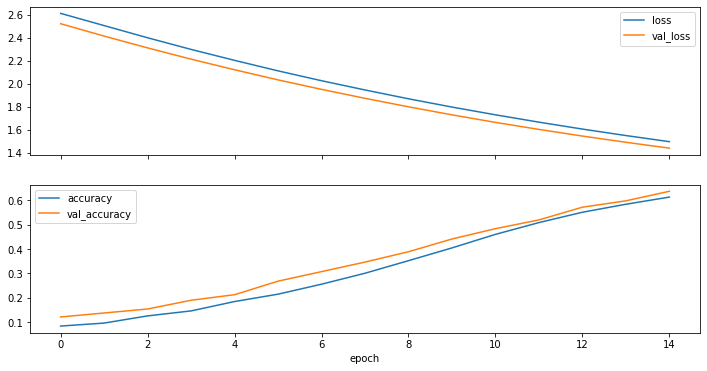

In [96]:
# %load solutions/keras_sgd_and_momentum.py
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim,
                activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

optimizer = optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=15, batch_size=32)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);


# Analysis:
#
# Setting the learning rate value to a small value (e.g. lr=0.001 on
# this dataset) makes the model train much slower (it has not
# converged yet after 15 epochs).
#
# Using momentum tends to mitigate the small learning rate / slow
# training problem a bit.
#
# Setting the learning rate to a very large value (e.g. lr=10)
# makes the model randomly bounce around a good local
# minimum and therefore prevent it to reach a low training loss even
# after 30 epochs.


- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

  Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

In [74]:
optimizers.Adam?

In [79]:
input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="relu"))
model.add(Dense(hidden_dim, activation="relu"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
39/39 [==============================] - 1s 7ms/step - loss: 1.5870 - accuracy: 0.5717 - val_loss: 0.8319 - val_accuracy: 0.8725
Epoch 2/15
39/39 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 0.9099 - val_loss: 0.3201 - val_accuracy: 0.9314
Epoch 3/15
39/39 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9525 - val_loss: 0.2022 - val_accuracy: 0.9412
Epoch 4/15
39/39 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9705 - val_loss: 0.1641 - val_accuracy: 0.9575
Epoch 5/15
39/39 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9844 - val_loss: 0.1220 - val_accuracy: 0.9706
Epoch 6/15
39/39 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9910 - val_loss: 0.1109 - val_accuracy: 0.9771
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9951 - val_loss: 0.1059 - val_accuracy: 0.9771
Epoch 8/15
39/39 [==

In [82]:
# %load solutions/keras_adam.py
# %load solutions/keras_adam_and_adadelta.py

### Exercises: Forward Pass and Generalization

- Compute predictions on test set using `model.predict(...)`
- Compute average accuracy of the model on the test set: the fraction of test samples for which the model makes a prediction that matches the true label.

In [90]:
print(X_test.shape, y_test.shape)
model.predict(X_test) 

(270, 64) (270,)


array([[2.23955099e-09, 1.54495356e-05, 9.99978781e-01, ...,
        1.16336673e-06, 4.16310577e-08, 1.26814115e-08],
       [4.42290620e-05, 3.05828465e-08, 1.83961745e-07, ...,
        2.56210546e-06, 1.79021043e-07, 1.02016083e-10],
       [6.81768597e-08, 3.14707104e-05, 1.15698449e-05, ...,
        9.99903560e-01, 1.76203997e-07, 2.29128382e-05],
       ...,
       [4.03340411e-04, 4.42091888e-03, 1.15349714e-03, ...,
        1.52920097e-01, 8.30868125e-01, 1.63427740e-03],
       [7.22371351e-06, 7.72962994e-06, 8.76294052e-07, ...,
        1.64945880e-06, 4.02897967e-05, 9.96303797e-01],
       [9.99937057e-01, 2.14085105e-08, 2.47668213e-05, ...,
        3.35196864e-06, 9.66425796e-06, 1.27614330e-05]], dtype=float32)

In [91]:
y_test

array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 2, 0, 5, 4, 8, 7, 0, 3, 6, 8, 1,
       9, 8, 0, 9, 8, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1,
       6, 5, 0, 1, 9, 4, 8, 5, 3, 9, 3, 4, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2,
       6, 8, 6, 8, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 4,
       6, 0, 6, 0, 8, 3, 6, 7, 3, 0, 7, 4, 8, 5, 8, 1, 4, 1, 2, 5, 1, 4,
       8, 9, 9, 0, 9, 5, 6, 8, 2, 1, 4, 5, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2,
       5, 6, 9, 1, 2, 7, 6, 0, 9, 2, 1, 6, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3,
       3, 4, 1, 2, 2, 5, 6, 0, 7, 9, 6, 8, 6, 1, 1, 3, 5, 2, 0, 9, 0, 2,
       2, 8, 0, 7, 6, 0, 8, 5, 3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7,
       4, 0, 8, 1, 4, 0, 8, 8, 6, 5, 0, 1, 6, 2, 0, 4, 7, 5, 3, 7, 3, 4,
       5, 9, 9, 7, 3, 4, 5, 8, 1, 1, 9, 5, 5, 1, 4, 1, 2, 9, 2, 9, 5, 3,
       6, 0, 8, 6, 7, 6, 7, 9, 2, 6, 8, 3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5,
       2, 8, 8, 8, 9, 0], dtype=int32)

test acc: 0.9815


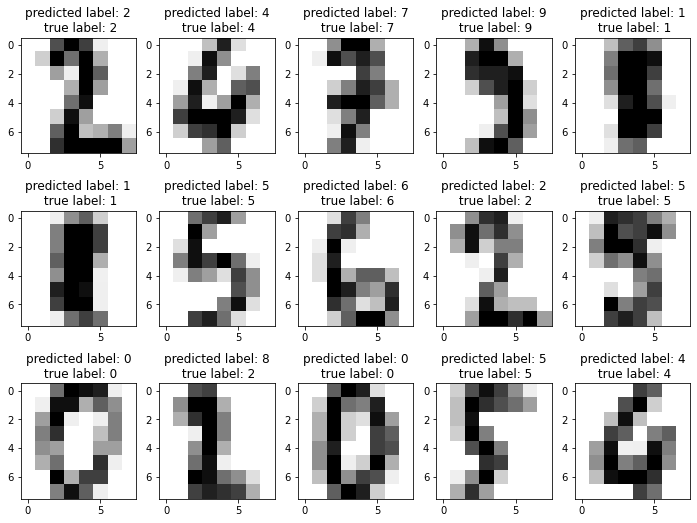

In [93]:
# %load solutions/keras_accuracy_on_test_set.py
y_predicted = np.argmax(model.predict(X_test, verbose=0), axis=1)

# Let's display the first inputs image, the predicted labels and the true labels
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(12, 9))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(scaler.inverse_transform(X_test[i:i+1]).reshape(8, 8),
              cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("predicted label: %d\n true label: %d"
                 % (y_predicted[i], y_test[i]))

print("test acc: %0.4f" % np.mean(y_predicted == y_test))


Let us decompose how we got the predictions. First, we call the model on the data to get the laster layer (softmax) outputs directly as a tensorflow Tensor:

In [33]:
predictions_tf = model(X_test)
predictions_tf[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.43261815e-07, 1.08828674e-04, 9.99701083e-01, 1.31995141e-04,
        1.18320969e-07, 2.93973471e-07, 1.09421865e-06, 2.27737110e-05,
        2.53655053e-05, 8.37207790e-06],
       [7.27364048e-03, 8.51079312e-06, 3.14727640e-06, 1.26631026e-08,
        9.91210461e-01, 2.68825465e-06, 1.35615666e-03, 1.40431104e-04,
        4.35678612e-06, 5.84620011e-07],
       [7.71420491e-06, 5.80787164e-05, 9.99811527e-05, 3.92248854e-04,
        7.34957212e-05, 1.65601068e-05, 3.95763749e-07, 9.98923361e-01,
        4.84833117e-06, 4.23199730e-04],
       [2.46737472e-04, 3.15814302e-03, 2.72015095e-05, 4.69602086e-03,
        1.44931173e-05, 1.20488425e-04, 4.00575391e-06, 2.10999133e-05,
        1.32855994e-03, 9.90383327e-01],
       [1.66922164e-05, 9.75829840e-01, 2.11014340e-04, 4.87224374e-04,
        3.95842100e-04, 1.06195930e-05, 6.77514763e-05, 1.46513572e-03,
        2.07633544e-02, 7.52499909e-04]], dtype=float32)>

In [34]:
type(predictions_tf), predictions_tf.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([270, 10]))

We can use the tensorflow API to check that for each row, the probabilities sum to 1:

In [35]:
import tensorflow as tf

tf.reduce_sum(predictions_tf, axis=1)[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.        , 0.99999994, 0.9999999 , 1.0000001 , 0.99999994],
      dtype=float32)>

We can also extract the label with the highest probability using the tensorflow API:

In [36]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 7, 9, 1])>

We can compare those labels to the expected labels to compute the accuracy with the Tensorflow API. Note however that we need an explicit cast from boolean to floating point values to be able to compute the mean accuracy when using the tensorflow tensors:

In [37]:
accuracy_tf = tf.reduce_mean(tf.cast(predicted_labels_tf == y_test, tf.float64))
accuracy_tf

<tf.Tensor: shape=(), dtype=float64, numpy=0.9777777777777777>

Also note that it is possible to convert tensors to numpy array if one prefer to use numpy:

In [38]:
accuracy_tf.numpy()

0.9777777777777777

In [39]:
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 7, 9, 1])>

In [40]:
predicted_labels_tf.numpy()[:5]

array([2, 4, 7, 9, 1])

In [41]:
(predicted_labels_tf.numpy() == y_test).mean()

0.9777777777777777

## Home Assignment: Impact of Initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [42]:
from tensorflow.keras import initializers

normal_init = initializers.TruncatedNormal(stddev=0.01)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.layers

Let's have a look at the parameters of the first layer after initialization but before any training has happened:

In [44]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[-0.00169253,  0.00396862,  0.01435855, ...,  0.00622966,
          0.00397949, -0.00692498],
        [ 0.0113344 ,  0.01270405,  0.00038039, ..., -0.0082805 ,
         -0.00311222, -0.00823139],
        [-0.00955998,  0.00088186,  0.00087087, ...,  0.00328724,
         -0.00082558, -0.01775672],
        ...,
        [ 0.00879492,  0.00079118, -0.01379645, ..., -0.0037515 ,
          0.01449156,  0.00759383],
        [-0.0040359 , -0.00631556,  0.00597182, ...,  0.00131541,
         -0.00540338,  0.00504119],
        [-0.01141396, -0.0128922 ,  0.00510595, ...,  0.01307579,
          0.00084426,  0.00304866]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [45]:
w = model.layers[0].weights[0].numpy()
w

array([[-0.00169253,  0.00396862,  0.01435855, ...,  0.00622966,
         0.00397949, -0.00692498],
       [ 0.0113344 ,  0.01270405,  0.00038039, ..., -0.0082805 ,
        -0.00311222, -0.00823139],
       [-0.00955998,  0.00088186,  0.00087087, ...,  0.00328724,
        -0.00082558, -0.01775672],
       ...,
       [ 0.00879492,  0.00079118, -0.01379645, ..., -0.0037515 ,
         0.01449156,  0.00759383],
       [-0.0040359 , -0.00631556,  0.00597182, ...,  0.00131541,
        -0.00540338,  0.00504119],
       [-0.01141396, -0.0128922 ,  0.00510595, ...,  0.01307579,
         0.00084426,  0.00304866]], dtype=float32)

In [46]:
w.std()

0.00869675

In [47]:
b = model.layers[0].weights[1].numpy()
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Epoch 1/15
48/48 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1061
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 2.3000 - accuracy: 0.1087
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 2.2885 - accuracy: 0.1611
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 2.0825 - accuracy: 0.2305
Epoch 5/15
48/48 [==============================] - 0s 3ms/step - loss: 1.5494 - accuracy: 0.4407
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9292 - accuracy: 0.7263
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.8016
Epoch 8/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.8402
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8723
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.9031
Epoch 11/15
48/48 [

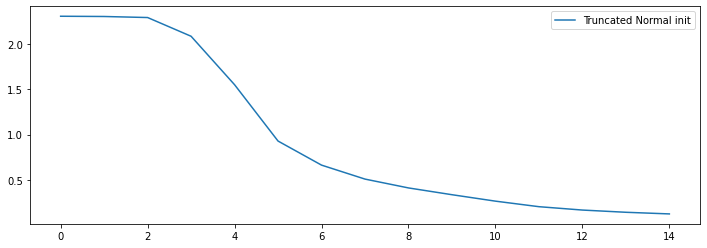

In [48]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

Once the model has been fit, the weights have been updated and notably the biases are no longer 0:

In [49]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[-0.00169253,  0.00396862,  0.01435855, ...,  0.00622966,
          0.00397949, -0.00692498],
        [ 0.03074102, -0.01026841,  0.06213528, ...,  0.02884318,
          0.02130808, -0.00144489],
        [ 0.04237423, -0.02638358,  0.0576559 , ...,  0.07066577,
          0.04010509, -0.0095018 ],
        ...,
        [-0.0516385 , -0.01832524, -0.00800743, ..., -0.05572199,
         -0.01865478,  0.01488868],
        [-0.03846915, -0.03968743,  0.0364503 , ..., -0.00881098,
         -0.03131893,  0.03593275],
        [-0.06250453, -0.11434999,  0.01968672, ..., -0.0158427 ,
         -0.02078283,  0.06293776]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32, numpy=
 array([-2.17173062e-02, -7.02357888e-02, -4.46003978e-04, -1.95406675e-02,
        -1.94213334e-02,  5.78443520e-03,  2.51426036e-03,  5.13290055e-02,
         1.87135302e-02, -3.34032625e-02,  3.18544433e-02, -1.188258

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `stddev=1e-3`
  - a larger scale e.g. `stddev=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are more advanced solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [50]:
# %load solutions/keras_initializations.py

In [51]:
# %load solutions/keras_initializations_analysis.py